# Project Results Group N1

This notebook provides all necessary commands and linkings to generate novel face images from our trained conditional generator model.

The required pre-trained models (cPGAN and DCGAN) and code will be loaded from automatically from google drive and the github repository. Just execute all setups cells and you are ready to go in a few seconds! No manual upload is needed.

For the project summary and code details visit our repository at [GitHub](https://github.com/konstantinjdobler/gan-n1).
To download the models manually go to our [drive](https://drive.google.com/drive/folders/1S0dfdo0s9yk9h8Q1sqvOqV3MDdAiGBPo).

**Authors:** Konstantin Dobler, Stefanie Lewandowski, Kenneth Schröder, Pascal Schulze, and Ole Wegen


# Setup

All necessary (meta) files (models, losses and code) will be downloaded here for generation and visualization. 

The whole process can take a few seconds.

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
import csv

In [ ]:
# Clone gan-n1 repository
%cd /content/
! rm -rf 'gan-n1'
! git clone https://github.com/konstantinjdobler/gan-n1.git
! mkdir gan-n1/generated_images
! mkdir gan-n1/generated_images/pgan/
! mkdir gan-n1/generated_images/dcgan/

/content
Cloning into 'gan-n1'...
remote: Enumerating objects: 273, done.
remote: Counting objects: 100% (273/273), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 668 (delta 177), reused 165 (delta 85), pack-reused 395
Receiving objects: 100% (668/668), 344.99 MiB | 30.56 MiB/s, done.
Resolving deltas: 100% (414/414), done.


In [ ]:
# Download PGAN model from drive
file_id = "1ePOOSm_CFxFwCuSYzFiTlakOmB6lo8JT"
PGAN_MODEL_PATH = "gan-n1/src/PGAN/MODEL.pt"
! wget -q --show-progress --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id={file_id}' -O- | sed -n 's/.*\(confirm=....\).*/\1/p')&id={file_id}" -O {PGAN_MODEL_PATH} && rm -rf /tmp/cookies.txt

# Download PGAN losses from drive
file_id = "1sFn0OnJ4drqj2vHXHUpdxcRs70hQ1mVH"
PGAN_LOSS_PATH = "gan-n1/src/PGAN/LOSS.txt"
! wget -q --show-progress --no-check-certificate 'https://drive.google.com/uc?export=download&id={file_id}' -O {PGAN_LOSS_PATH}

gan-n1/src/PGAN/MOD     [             <=>    ] 529.08M   122MB/s    in 4.2s    
gan-n1/src/PGAN/LOS     [ <=>                ]   7.15M  --.-KB/s    in 0.08s   


In [ ]:
# Download DCGAN model from drive
file_id = "1fkbmCkhAJ-pa6k5NBBD3vJN3ajqjY39X"
DCAN_MODEL_PATH = "gan-n1/src/DCGAN/MODEL.pt"
! wget -q --show-progress --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id={file_id}' -O- | sed -n 's/.*\(confirm=....\).*/\1/p')&id={file_id}" -O {DCAN_MODEL_PATH} && rm -rf /tmp/cookies.txt


gan-n1/src/DCGAN/MO     [  <=>               ]  77.05M   196MB/s    in 0.4s    


# Image Generation

Here, we will demonstrate our model inference. First, we will compare our two models (cPGAN and cDCGAN) in general. Then we will show some interesting effects in the images we were able to generate.

To speed up the generation, you can switch the runtime to use GPU hardware acceleration.

---



In [ ]:
# Setup generation code
def generate_images_dcgan(attribute_file, number_of_images=8, image_ratio=128, latent_vector_dimension=512):
  output_file_name = f"gan-n1/generated_images/dcgan/{attribute_file}.png"
  print("cDCGAN results:")
  !python3 gan-n1/src/DCGAN/generate.py --result-path {output_file_name} \
    -g {DCAN_MODEL_PATH} \
    --attributes "gan-n1/src/attribute_files/{attribute_file}.txt"\
    -n {number_of_images} \
    -r {image_ratio} \
    --nz {latent_vector_dimension}
  return output_file_name

def generate_images_pgan(attribute_file, number_of_images=8, image_ratio=128):
  output_file_name = f"gan-n1/generated_images/pgan/{attribute_file}.png"
  print("cPGAN results:")
  ! python3 gan-n1/src/PGAN/generate.py \
    --result-path {output_file_name} \
    --c {PGAN_MODEL_PATH} \
    -a gan-n1/src/attribute_files/{attribute_file}.txt \
    -n {number_of_images} \
    -r {image_ratio}
  return output_file_name

## General comparison

Blonde women is one of the combinations where the cDCGAN performs best. For blonde hair, the model has been able to learn a good amount of texture. However, you will notice that many results look similar, especially the eyes, eyebrows, and mouths. This is because the cDCGAN model suffers from a degree of mode collapse. Nevertheless, the faces do look distinct.

cDCGAN results:
Running on the CPU


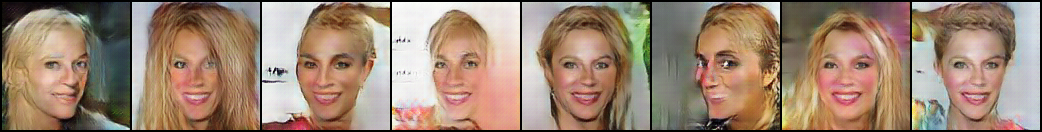

cPGAN results:
Running on the CPU


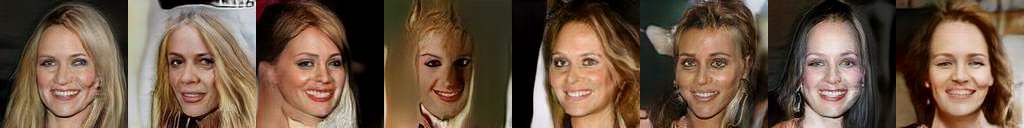

In [ ]:
display(Image(generate_images_dcgan("attributes_blond_woman")))
Image(generate_images_pgan("attributes_blond_woman"))

Next we demonstrate a category where the cPGAN performs better. Its results are significantly more detailed and have a more realistic skin and hair texture than the cDCGAN. Here we can see that the cDCGAN has more problems with darker hair; the hair often has little texture or merges with the background.

cDCGAN results:
Running on the CPU


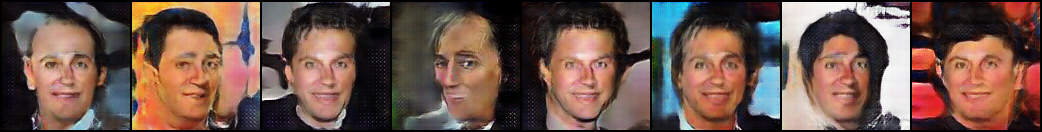

cPGAN results:
Running on the CPU


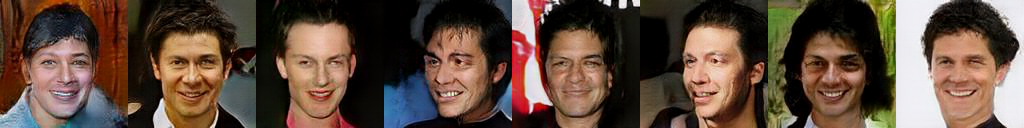

In [ ]:
display(Image(generate_images_dcgan("attributes_blackhaired_man")))
Image(generate_images_pgan("attributes_blackhaired_man"))

Here we demonstrate an attribute combination (```Bald```and ```Glasses```) that generally produces unsatisfying results. While the cPGAN's results are of a much higher quality than the cDCGAN's, neither model is reliably capable of producing results that are actually bald.

cDCGAN results:
Running on the CPU


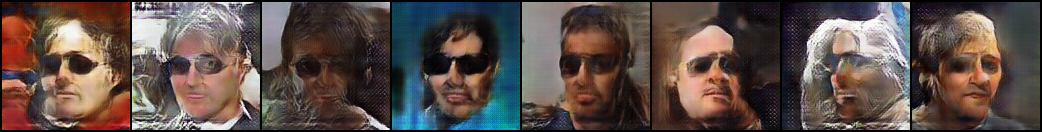

cPGAN results:
Running on the CPU


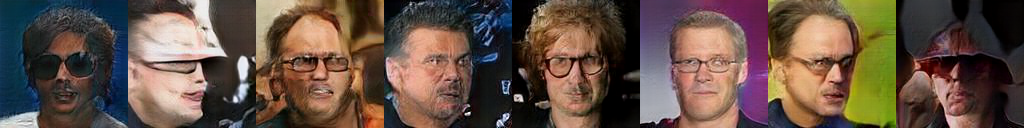

In [ ]:
display(Image(generate_images_dcgan("attributes_bald_man_glasses")))
Image(generate_images_pgan("attributes_bald_man_glasses"))

## Interesting attribute combinations

First, we demonstrate the effect of changing a single attribute. The cPGAN is able to generate impressively varied and detailed bangs. Even the cDCGAN model is capable of producing realistic looking bangs, and only adds them to the hairstyle when the ```Bangs```attribute is set. 

No bangs:
cDCGAN results:
Running on the CPU


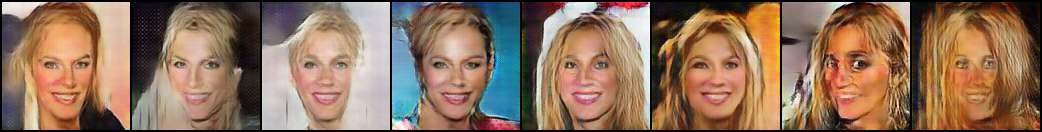

With bangs:
cDCGAN results:
Running on the CPU


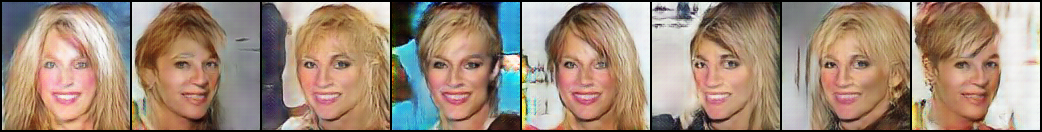

---------------------------------------------------------------------------
No bangs:
cPGAN results:
Running on the CPU


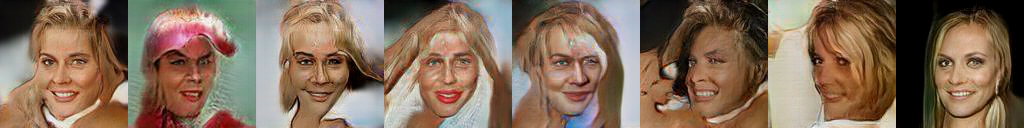

With bangs:
cPGAN results:
Running on the CPU


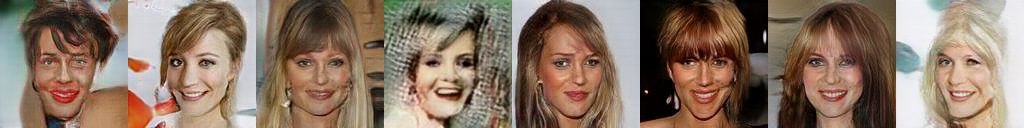

In [ ]:
print("No bangs:")
display(Image(generate_images_dcgan("attributes_blond_woman")))
print("With bangs:")
display(Image(generate_images_dcgan("attributes_blond_woman_with_bangs")))
print("---------------------------------------------------------------------------")
print("No bangs:")
display(Image(generate_images_pgan("attributes_blond_woman")))
print("With bangs:")
Image(generate_images_pgan("attributes_blond_woman_with_bangs"))

Next, let us explore the realationship between different attributes. We will see that both models have some degree of condition entaglement, i.e. setting one attribute influences the result also in other attributes. One example are the ```Wearing_Necklace```, ```Wearing_Earrings``` and ```Heavy_Makeup``` attributes. It appears that the cDCGAN model has learned them as proxies for "female-looking" faces, setting them to true produces some "female-looking" samples even when ```Male:1```is set. The cPGAN has this effect only with the ```Heavy_Makeup``` attribute and the effect is not as pronounced.

cDCGAN results:
Running on the CPU


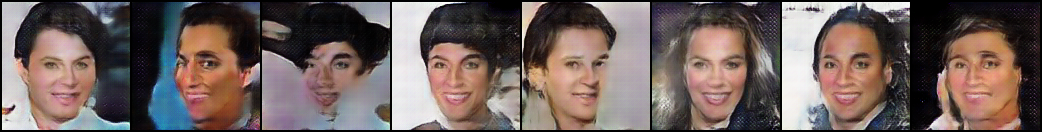

cPGAN results:
Running on the CPU


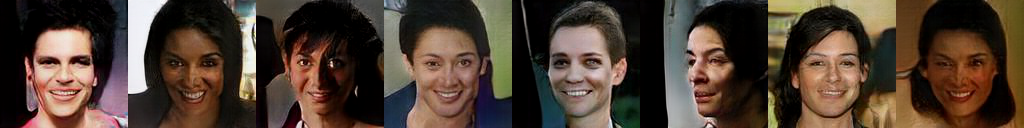

In [ ]:
display(Image(generate_images_dcgan("attributes_blackhaired_man_female_entanglement")))
Image(generate_images_pgan("attributes_blackhaired_man_female_entanglement"))

Beards are in fashion right now, so let's generate some bearded faces! Unfortunately, the cDCGAN model does not produce good bearded results. There are three different beard attributes: 5 o'clock shadow, mustache and goatee. The cPGAN is capable of producing bearded faces, however it is not accurate in hitting the specific beard attributes. The most clearly bearded results are achieved when setting all 3 attributes to true, however there are still samples without a beard. 

Only mustache:
cPGAN results:
Running on the CPU


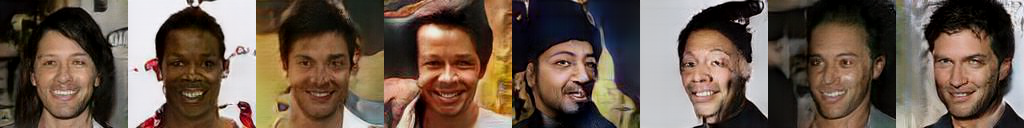

All three beard attributes:
cPGAN results:
Running on the CPU


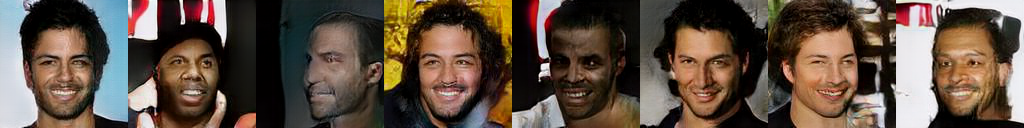

In [ ]:
print("Only mustache:")
display(Image(generate_images_pgan("attributes_male_mustache")))
print("All three beard attributes:")
Image(generate_images_pgan("attributes_male_all_beard_categories"))


# Loss Plots

This cell produces a chart of the losses our cPGAN model had while training on the 128x128 resolution. As we can see, the generator's loss is much spikier than the discriminator, which is normal for GAN training. Note that the cPGAN uses Wasserstein loss instead of binary cross-entropy, which is the reason why the loss values are much higher and also sometimes negative.

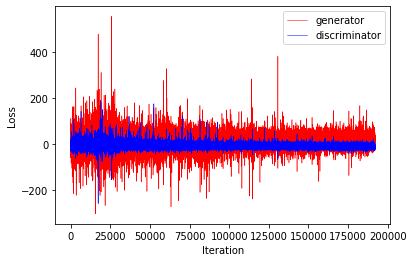

In [ ]:
# ! python3 gan-n1/src/PGAN/helper/make_chart.py {LOSS_PATH}
x=[]
yg = []
yd = []

with open(PGAN_LOSS_PATH, 'r') as csvfile:
  plots = csv.reader(csvfile,delimiter=",")
  for count, row in enumerate(plots):
    x.append(count)
    yg.append(float(row[1]))
    yd.append(float(row[0]))

plt.plot(x,yg,linewidth=0.5, color='red', label='generator')
plt.plot(x,yd,linewidth=0.5, color='blue', label='discriminator')

plt.legend(loc='best')

plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.show()

# Playground


Here you have the possibility to test out the models yourselves by trying different attribute combinations. Setting an attribute to ```1``` enables that condition, while setting it to ```-1``` disables that condition. Keep in mind that setting multiple mutually exclusive attributes to true such as ```Bald:1``` and ```Black_Hair:1``` will lead to bad results. Also keep in mind that there are a lot of mutually exclusive attributes. Attributes that are not necessarily mutually exclusive like ```Bald:1``` and ```Male:-1``` (female) will still yield bad results as they are a rare combination in the training data.

It is most interesting to change one attribute at a time and observe the resulting changes. As a starter: ```Smiling:1``` with ```Mouth_Slightly_Open:-1``` usually generates faces with smiles that show no teeth, while setting ```Mouth_Slightly_Open:1``` creates faces where the smiles show more teeth.

In [ ]:
def create_custom_attribute_file(attribute_dict):
  with open('gan-n1/src/attribute_files/custom_attributes.txt', "w") as attr_file:
            attr_file.writelines((f'{attr},{value}\n' for attr, value in attribute_dict.items()))

cDCGAN results:
Running on the CPU


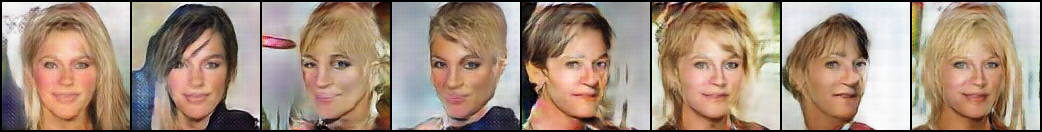

cPGAN results:
Running on the CPU


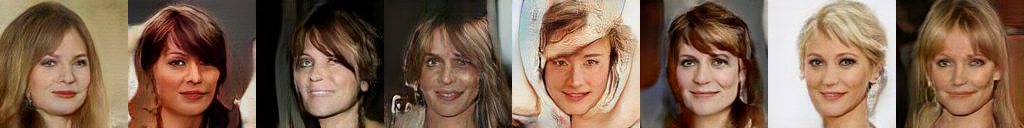

In [ ]:
attributes = {
"5_o_Clock_Shadow":-1,
"Arched_Eyebrows":-1,
"Attractive":1,
"Bags_Under_Eyes":-1,
"Bald":-1,
"Bangs":1,
"Big_Lips":-1,
"Big_Nose":-1,
"Black_Hair":-1,
"Blond_Hair":1,
"Blurry":-1,
"Brown_Hair":-1,
"Bushy_Eyebrows":-1,
"Chubby":-1,
"Double_Chin":-1,
"Eyeglasses":-1,
"Goatee":-1,
"Gray_Hair":-1,
"Heavy_Makeup":-1,
"High_Cheekbones":1,
"Male":-1,
"Mouth_Slightly_Open":-1,
"Mustache":-1,
"Narrow_Eyes":-1,
"No_Beard":1,
"Oval_Face":-1,
"Pale_Skin":-1,
"Pointy_Nose":-1,
"Receding_Hairline":-1,
"Rosy_Cheeks":1,
"Sideburns":-1,
"Smiling":1,
"Straight_Hair":1,
"Wavy_Hair":-1,
"Wearing_Earrings":1,
"Wearing_Hat":-1,
"Wearing_Lipstick":1,
"Wearing_Necklace":1,
"Wearing_Necktie":-1,
"Young":1
}
create_custom_attribute_file(attributes)
display(Image(generate_images_dcgan("custom_attributes")))
Image(generate_images_pgan("custom_attributes"))